In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

from mytoolbox import *

# Hamiltonian, operators and eigenvalues
First explore eigenvalues of time independent Hamiltonian, and how they change and split around zfs as a function of the angle between the NV center axis and the applied magnetic field.

In particular explore the asymmetry in the splitting of the resonant frequencies as a function of the polar angle.

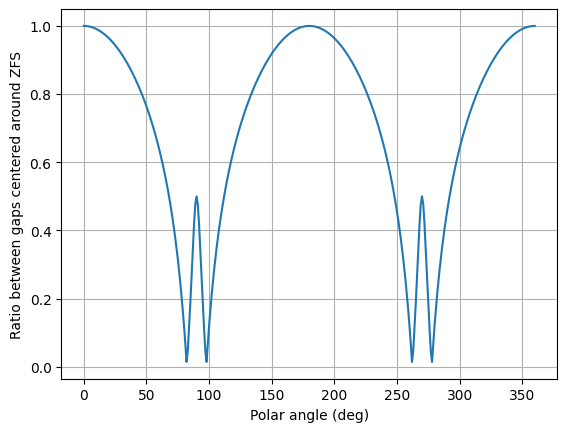

In [10]:
angles = np.linspace(0, 360, 361)
ratios = []
for polar in angles:
    ratios.append(split_ratio_given_angles(D, g_e, B ,polar, 0))

plt.plot(angles, ratios)
plt.ylabel('Ratio between gaps centered around ZFS')
plt.xlabel('Polar angle (deg)')
plt.grid(True)

# ODMR experiment

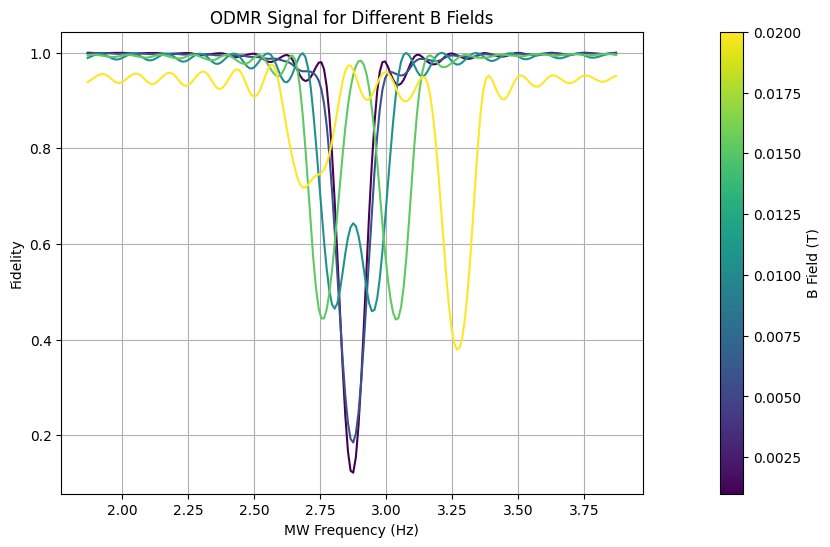

In [11]:
frequency_resolution = 200
frequency_width = 1
central_frequency = 2.87
frequency_range = np.linspace(central_frequency-frequency_width, central_frequency+frequency_width, frequency_resolution)



initial_state = qt.basis(3,1)

B = 0.0015
polar = 60   # Angle wrt z axis in degrees
azimuthal = 15   #Angle around the equator in degrees

B_fields = [0.001, 0.002, 0.005, 0.01, 0.02]  # Tesla

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(B_fields)))

for idx, B in enumerate(B_fields):
    Bz = B * np.cos(polar * np.pi / 180)
    Bx = B * np.sin(polar * np.pi / 180) * np.cos(azimuthal * np.pi / 180)
    By = B * np.sin(polar * np.pi / 180) * np.sin(azimuthal * np.pi / 180)
    
    H0 = D * Sz**2 + g_e * (Bz * Sz + Bx * Sx + By * Sy)
    fidelities = []

    for w in frequency_range:
        fidelities.append(fidelity(50, initial_state, H0, Sx, w, 0.05))

    ax.plot(frequency_range, fidelities, color=colors[idx], label=f'B = {B:.4f} T')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.1)
cbar.set_label('B Field (T)')

# Finalize plot
ax.set_xlabel('MW Frequency (Hz)')
ax.set_ylabel('Fidelity')
ax.set_title('ODMR Signal for Different B Fields')
ax.grid(True)
plt.show()

# ODMR for 4 different orientations of NV

Consider now B to be always aligned with the $\hat{z}$ axis. Consider four NV orientations $[111]$, $[1\overline 1\overline 1]$, $[\overline 1 1\overline 1]$, $[\overline 1 \overline 1 1]$. It is clear from the Hamiltonian that the ODMR spectrum solely depends on the projection of $\vec B$ onto the NV center axis. For this reason we can reduce the problem to a sum of four ODMRs as seen above with different values of polar angle, found by computing the angle between x,y,z and the z axis.

Define relative abundances of the four orientations in the sample.

In [12]:
orientations = [
    [1,1,1],
    [1,-1,-1],
    [-1,1,-1],
    [-1,-1,1]
]

for orientation in orientations:
    print(f'Angle of orientation {orientation} wrt z axis {np.degrees(angle_between_vectors((orientation), (0,0,1))):.2f} degrees')


Angle of orientation [1, 1, 1] wrt z axis 54.74 degrees
Angle of orientation [1, -1, -1] wrt z axis 125.26 degrees
Angle of orientation [-1, 1, -1] wrt z axis 125.26 degrees
Angle of orientation [-1, -1, 1] wrt z axis 54.74 degrees


## Assume uniform abundances of orientations

Explore ODMR spectra for two arbitrarily chosen angles wrt B field of 0 and 60 degrees

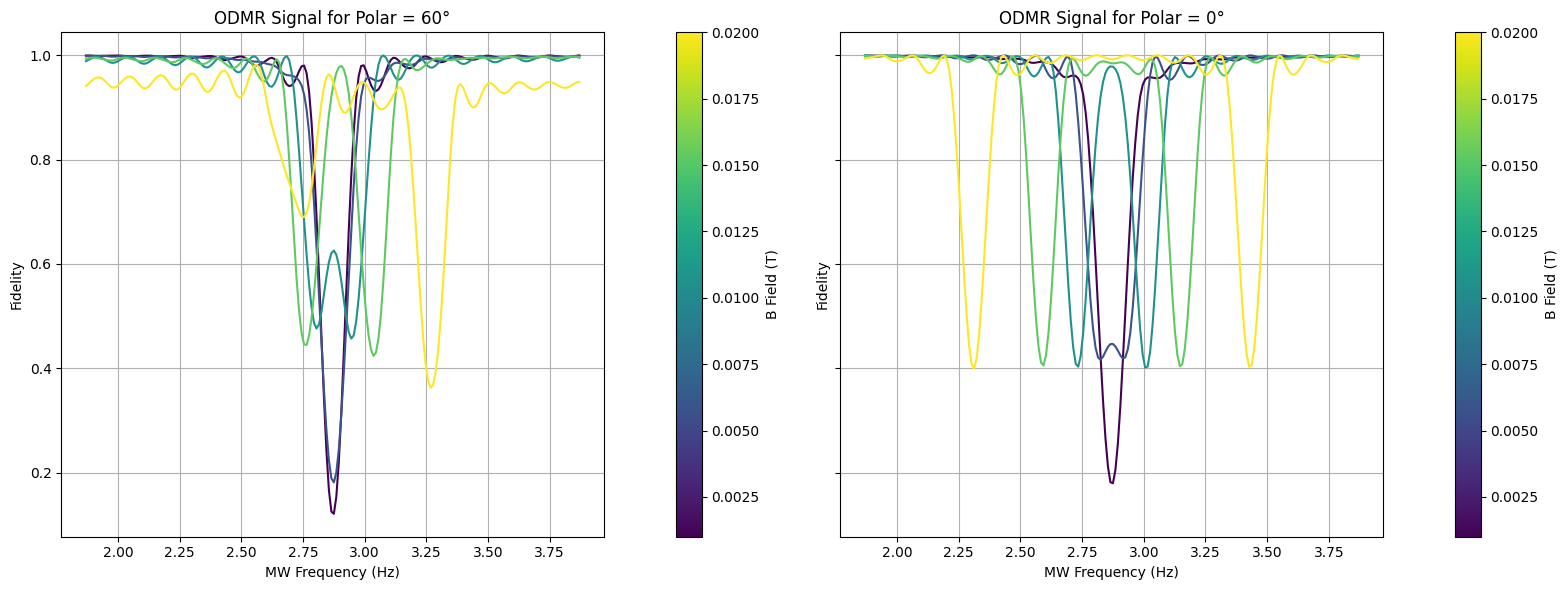

In [13]:
# Define B fields
B_fields = [0.001, 0.002, 0.005, 0.01, 0.02]  # Tesla

# Define polar angles
polar_angles = [60, 0]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

for i, polar in enumerate(polar_angles):
    ax = axs[i]
    colors = plt.cm.viridis(np.linspace(0, 1, len(B_fields)))

    for idx, B in enumerate(B_fields):
        Bz = B * np.cos(polar * np.pi / 180)
        Bx = B * np.sin(polar * np.pi / 180) * np.cos(0 * np.pi / 180)  # azimuthal = 0
        By = B * np.sin(polar * np.pi / 180) * np.sin(0 * np.pi / 180)  # azimuthal = 0
        
        H0 = D * Sz**2 + g_e * (Bz * Sz + Bx * Sx + By * Sy)
        fidelities = []

        for w in frequency_range:
            fidelities.append(fidelity(50, initial_state, H0, Sx, w, 0.05))

        ax.plot(frequency_range, fidelities, color=colors[idx], label=f'B = {B:.4f} T')

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, pad=0.1)
    cbar.set_label('B Field (T)')

    # Finalize plot
    ax.set_xlabel('MW Frequency (Hz)')
    ax.set_ylabel('Fidelity')
    ax.set_title(f'ODMR Signal for Polar = {polar}°')
    ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

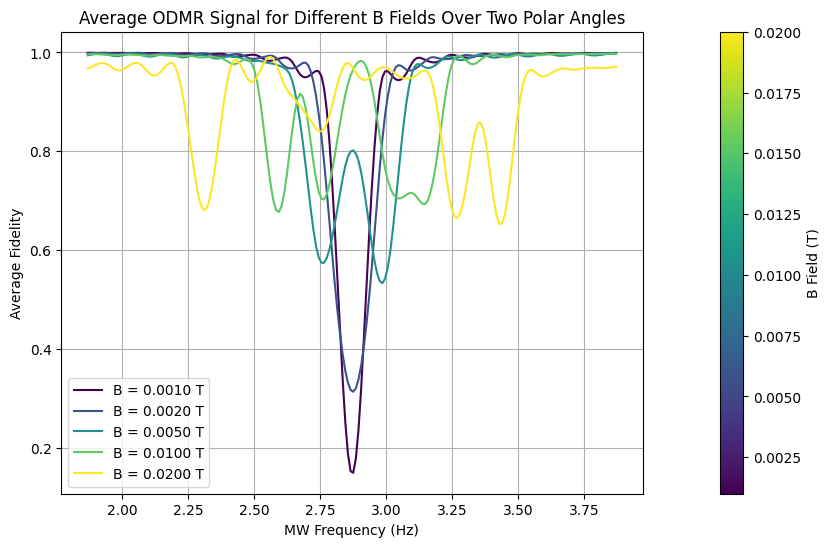

In [14]:
# Initialize an array to store average fidelities
average_fidelities = np.zeros((len(B_fields), len(frequency_range)))

# Compute average fidelities for each B field and frequency
for idx, B in enumerate(B_fields):
    fidelities_for_B = []

    for polar in polar_angles:
        Bz = B * np.cos(polar * np.pi / 180)
        Bx = B * np.sin(polar * np.pi / 180) * np.cos(0 * np.pi / 180)  # azimuthal = 0
        By = B * np.sin(polar * np.pi / 180) * np.sin(0 * np.pi / 180)  # azimuthal = 0
        
        H0 = D * Sz**2 + g_e * (Bz * Sz + Bx * Sx + By * Sy)
        fidelities = []

        for w in frequency_range:
            fidelities.append(fidelity(50, initial_state, H0, Sx, w, 0.05))

        fidelities_for_B.append(fidelities)

    # Average over polar angles
    average_fidelities[idx, :] = np.mean(fidelities_for_B, axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(B_fields)))

for idx, B in enumerate(B_fields):
    ax.plot(frequency_range, average_fidelities[idx, :], color=colors[idx], label=f'B = {B:.4f} T')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.1)
cbar.set_label('B Field (T)')

# Finalize plot
ax.set_xlabel('MW Frequency (Hz)')
ax.set_ylabel('Average Fidelity')
ax.set_title('Average ODMR Signal for Different B Fields Over Two Polar Angles')
ax.grid(True)
ax.legend()
plt.show()

# Real orientations, real B direction

[49.30115178402854, 119.43131938799836, 130.69884821597145, 60.56868061200164]


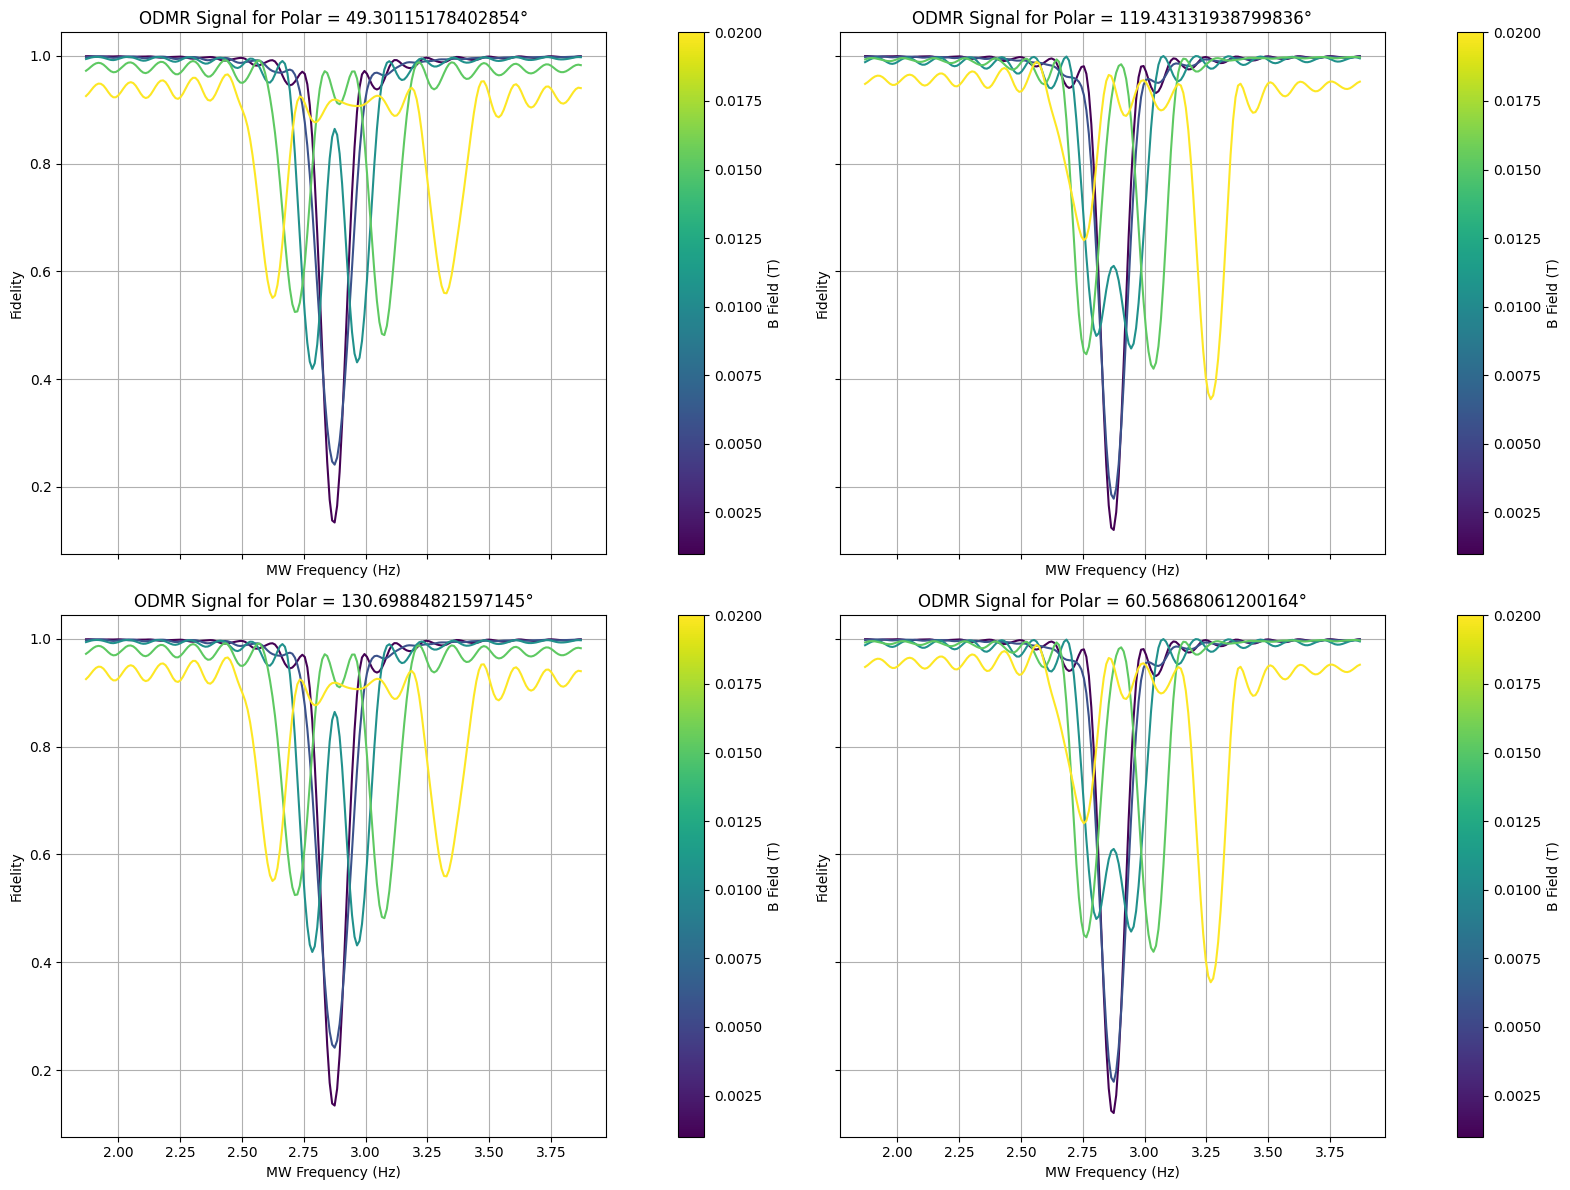

In [15]:
B = 0.01
polar = 8   # Angle wrt z axis in degrees
azimuthal = 0   #Angle around the equator in degrees

Bz = B * np.cos(polar * np.pi / 180)
Bx = B * np.sin(polar * np.pi / 180) * np.cos(azimuthal * np.pi / 180)
By = B * np.sin(polar * np.pi / 180) * np.sin(azimuthal * np.pi / 180)

effective_angles = []
for orientation in orientations:
    effective_angles.append(np.degrees(angle_between_vectors((orientation), (Bx, By, Bz))))

print(effective_angles)

polar_angles = effective_angles

# Define B fields
B_fields = [0.001, 0.002, 0.005, 0.01, 0.02]  # Tesla

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)

for i, polar in enumerate(polar_angles):
    ax = axs[i // 2, i % 2]  # Determine subplot location
    colors = plt.cm.viridis(np.linspace(0, 1, len(B_fields)))

    for idx, B in enumerate(B_fields):
        Bz = B * np.cos(polar * np.pi / 180)
        Bx = B * np.sin(polar * np.pi / 180) * np.cos(0 * np.pi / 180)  # azimuthal = 0
        By = B * np.sin(polar * np.pi / 180) * np.sin(0 * np.pi / 180)  # azimuthal = 0
        
        H0 = D * Sz**2 + g_e * (Bz * Sz + Bx * Sx + By * Sy)
        fidelities = []

        for w in frequency_range:
            fidelities.append(fidelity(50, initial_state, H0, Sx, w, 0.05))

        ax.plot(frequency_range, fidelities, color=colors[idx], label=f'B = {B:.4f} T')

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, pad=0.1)
    cbar.set_label('B Field (T)')

    # Finalize plot
    ax.set_xlabel('MW Frequency (Hz)')
    ax.set_ylabel('Fidelity')
    ax.set_title(f'ODMR Signal for Polar = {polar}°')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

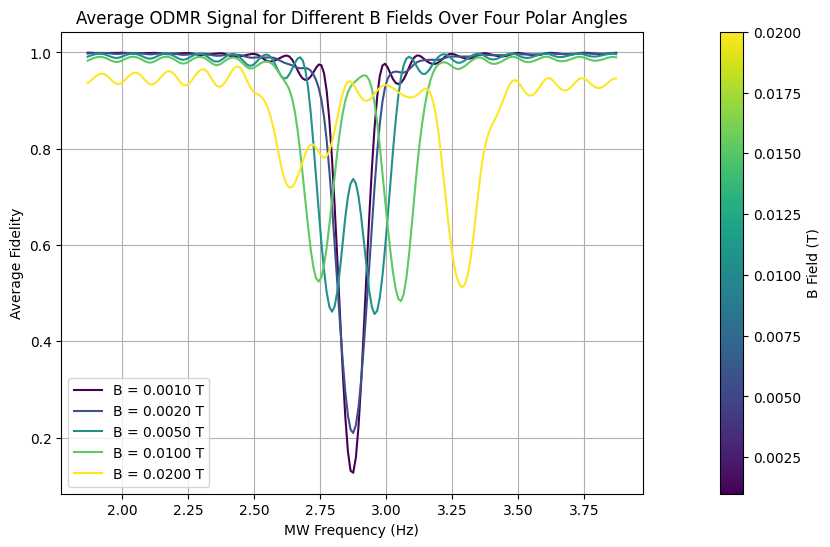

In [16]:
# Initialize an array to store average fidelities
average_fidelities = np.zeros((len(B_fields), len(frequency_range)))

# Compute average fidelities for each B field and frequency
for idx, B in enumerate(B_fields):
    fidelities_for_B = []

    for polar in polar_angles:
        Bz = B * np.cos(polar * np.pi / 180)
        Bx = B * np.sin(polar * np.pi / 180) * np.cos(0 * np.pi / 180)  # azimuthal = 0
        By = B * np.sin(polar * np.pi / 180) * np.sin(0 * np.pi / 180)  # azimuthal = 0
        
        H0 = D * Sz**2 + g_e * (Bz * Sz + Bx * Sx + By * Sy)
        fidelities = []

        for w in frequency_range:
            fidelities.append(fidelity(50, initial_state, H0, Sx, w, 0.05))

        fidelities_for_B.append(fidelities)

    # Average over polar angles
    average_fidelities[idx, :] = np.mean(fidelities_for_B, axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(B_fields)))

for idx, B in enumerate(B_fields):
    ax.plot(frequency_range, average_fidelities[idx, :], color=colors[idx], label=f'B = {B:.4f} T')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.1)
cbar.set_label('B Field (T)')

# Finalize plot
ax.set_xlabel('MW Frequency (Hz)')
ax.set_ylabel('Average Fidelity')
ax.set_title('Average ODMR Signal for Different B Fields Over Four Polar Angles')
ax.grid(True)
ax.legend()
plt.show()